In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import SimpleITK as sitk
from pathlib import Path
from IPython.display import HTML
import matplotlib.animation as animation

# Paths
PROCESSED_DIR = Path('/mnt/tcia_data/processed/RIDER Lung CT')
manifest_path = PROCESSED_DIR / 'manifest.csv'
manifest = pd.read_csv(manifest_path)
patients = manifest['patient_id'].unique()


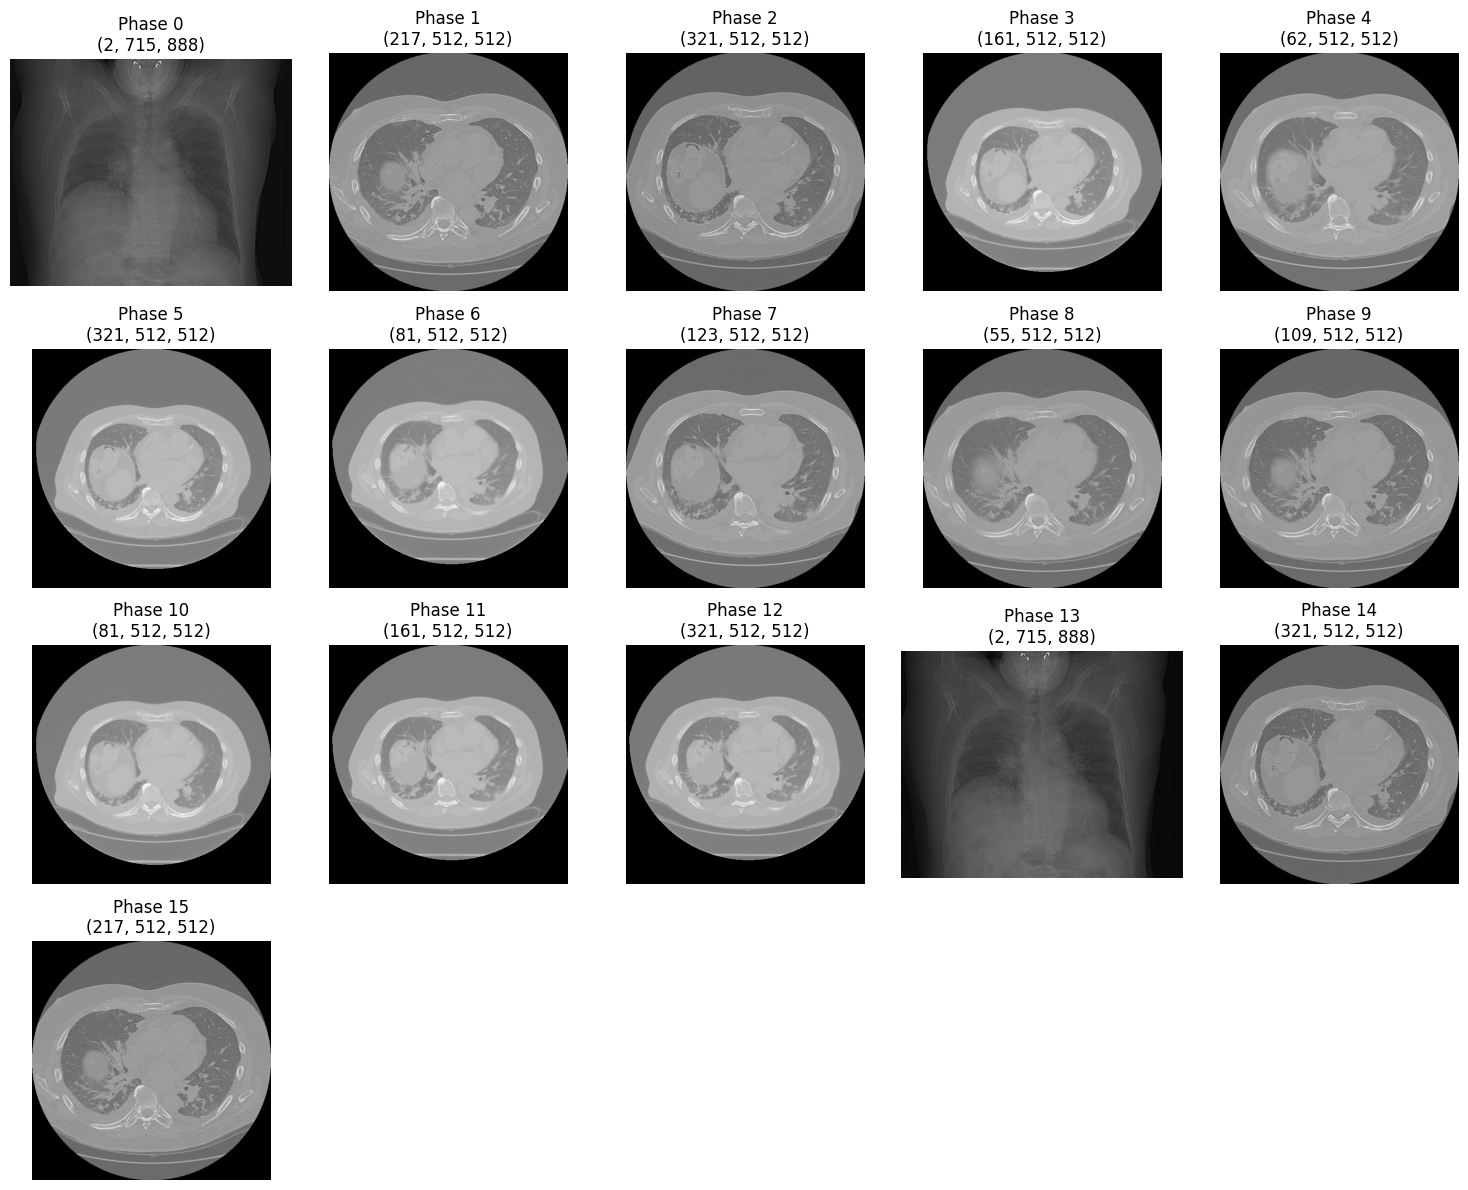

,phase_id,phase_percent,file,shape
0,0,0,/mnt/tcia_data/processed/RIDER Lung CT/RIDER-2...,"(2, 715, 888)"
1,1,7,/mnt/tcia_data/processed/RIDER Lung CT/RIDER-2...,"(217, 512, 512)"
2,2,13,/mnt/tcia_data/processed/RIDER Lung CT/RIDER-2...,"(321, 512, 512)"
3,3,20,/mnt/tcia_data/processed/RIDER Lung CT/RIDER-2...,"(161, 512, 512)"
4,4,27,/mnt/tcia_data/processed/RIDER Lung CT/RIDER-2...,"(62, 512, 512)"
5,5,33,/mnt/tcia_data/processed/RIDER Lung CT/RIDER-2...,"(321, 512, 512)"
6,6,40,/mnt/tcia_data/processed/RIDER Lung CT/RIDER-2...,"(81, 512, 512)"
7,7,47,/mnt/tcia_data/processed/RIDER Lung CT/RIDER-2...,"(123, 512, 512)"
8,8,53,/mnt/tcia_data/processed/RIDER Lung CT/RIDER-2...,"(55, 512, 512)"
9,9,60,/mnt/tcia_data/processed/RIDER Lung CT/RIDER-2...,"(109, 512, 512)"


In [9]:
# Paths
PROCESSED_DIR = Path('/mnt/tcia_data/processed/RIDER Lung CT')
manifest_path = PROCESSED_DIR / 'manifest.csv'
manifest = pd.read_csv(manifest_path)
patients = manifest['patient_id'].unique()

# Choose a patient
patient_id = patients[0]  # Change index as needed

# Get all phase files for the patient, sorted by phase_id
patient_manifest = manifest[manifest['patient_id'] == patient_id].sort_values('phase_id')
volume_paths = patient_manifest['file_path'].tolist()
phase_ids = patient_manifest['phase_id'].tolist()
phase_percents = patient_manifest['phase_percent'].tolist()

# For each phase, show the center slice, shape, and basic info
n_phases = len(volume_paths)
ncols = min(n_phases, 5)
nrows = (n_phases + ncols - 1) // ncols

plt.figure(figsize=(3*ncols, 3*nrows))
for idx, fp in enumerate(volume_paths):
    arr = np.load(fp)
    shape = arr.shape
    center_z = shape[0] // 2
    plt.subplot(nrows, ncols, idx+1)
    plt.imshow(arr[center_z], cmap='gray')
    plt.title(f"Phase {phase_ids[idx]}\n{shape}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Also print summary table for quick review
info = []
for idx, fp in enumerate(volume_paths):
    arr = np.load(fp)
    shape = arr.shape
    info.append({'phase_id': phase_ids[idx], 'phase_percent': phase_percents[idx], 'file': fp, 'shape': shape})
df_info = pd.DataFrame(info)
display(df_info)


In [10]:
# Paths
PROCESSED_DIR = Path('/mnt/tcia_data/processed/RIDER Lung CT')
manifest_path = PROCESSED_DIR / 'manifest.csv'
manifest = pd.read_csv(manifest_path)
patients = manifest['patient_id'].unique()

# Gather phase shape info for all patients
shape_info = []

for patient_id in patients:
    patient_manifest = manifest[manifest['patient_id'] == patient_id].sort_values('phase_id')
    phase_ids = patient_manifest['phase_id'].tolist()
    volume_paths = patient_manifest['file_path'].tolist()
    for idx, fp in enumerate(volume_paths):
        arr = np.load(fp)
        shape_info.append({'patient_id': patient_id, 'phase_id': phase_ids[idx], 'shape': arr.shape, 'file': fp})

df_shape = pd.DataFrame(shape_info)
display(df_shape)

# Group by phase_id and shape to see if e.g. phase 0, 13 are always the same odd shape
pivot = df_shape.groupby(['phase_id', 'shape']).size().reset_index(name='count')
display(pivot)

# Optionally, print a summary
print("Summary of shape counts by phase:")
for phase_id in sorted(df_shape['phase_id'].unique()):
    counts = df_shape[df_shape['phase_id'] == phase_id]['shape'].value_counts()
    print(f"Phase {phase_id}:")
    print(counts)
    print()


,patient_id,phase_id,shape,file
0,RIDER-2016615262,0,"(2, 715, 888)",/mnt/tcia_data/processed/RIDER Lung CT/RIDER-2...
1,RIDER-2016615262,1,"(217, 512, 512)",/mnt/tcia_data/processed/RIDER Lung CT/RIDER-2...
2,RIDER-2016615262,2,"(321, 512, 512)",/mnt/tcia_data/processed/RIDER Lung CT/RIDER-2...
3,RIDER-2016615262,3,"(161, 512, 512)",/mnt/tcia_data/processed/RIDER Lung CT/RIDER-2...
4,RIDER-2016615262,4,"(62, 512, 512)",/mnt/tcia_data/processed/RIDER Lung CT/RIDER-2...
...,...,...,...,...
549,RIDER-9763310455,11,"(277, 512, 512)",/mnt/tcia_data/processed/RIDER Lung CT/RIDER-9...
550,RIDER-9763310455,12,"(139, 512, 512)",/mnt/tcia_data/processed/RIDER Lung CT/RIDER-9...
551,RIDER-9763310455,13,"(261, 512, 512)",/mnt/tcia_data/processed/RIDER Lung CT/RIDER-9...
552,RIDER-9763310455,14,"(277, 512, 512)",/mnt/tcia_data/processed/RIDER Lung CT/RIDER-9...


,phase_id,shape,count
0,0,"(2, 660, 888)",1
1,0,"(2, 697, 888)",4
2,0,"(2, 715, 888)",1
3,0,"(52, 512, 512)",1
4,0,"(56, 512, 512)",1
...,...,...,...
461,31,"(63, 512, 512)",1
462,32,"(130, 512, 512)",1
463,33,"(250, 512, 512)",1
464,34,"(213, 512, 512)",1


Summary of shape counts by phase:
Phase 0:
shape
(2, 697, 888)      4
(281, 512, 512)    2
(2, 715, 888)      1
(285, 512, 512)    1
(289, 512, 512)    1
(257, 512, 512)    1
(99, 512, 512)     1
(115, 512, 512)    1
(113, 512, 512)    1
(56, 512, 512)     1
(134, 512, 512)    1
(147, 512, 512)    1
(245, 512, 512)    1
(2, 660, 888)      1
(250, 512, 512)    1
(52, 512, 512)     1
(62, 512, 512)     1
(72, 512, 512)     1
(65, 512, 512)     1
(107, 512, 512)    1
(277, 512, 512)    1
(133, 512, 512)    1
(63, 512, 512)     1
(58, 512, 512)     1
(141, 512, 512)    1
(225, 512, 512)    1
(129, 512, 512)    1
(70, 512, 512)     1
Name: count, dtype: int64

Phase 1:
shape
(59, 512, 512)     3
(119, 512, 512)    2
(71, 512, 512)     2
(2, 697, 888)      2
(143, 512, 512)    1
(57, 512, 512)     1
(66, 512, 512)     1
(97, 512, 512)     1
(2, 715, 888)      1
(127, 512, 512)    1
(217, 512, 512)    1
(245, 512, 512)    1
(273, 512, 512)    1
(75, 512, 512)     1
(62, 512, 512)     1
(133, 

Found 127 outlier phase images.


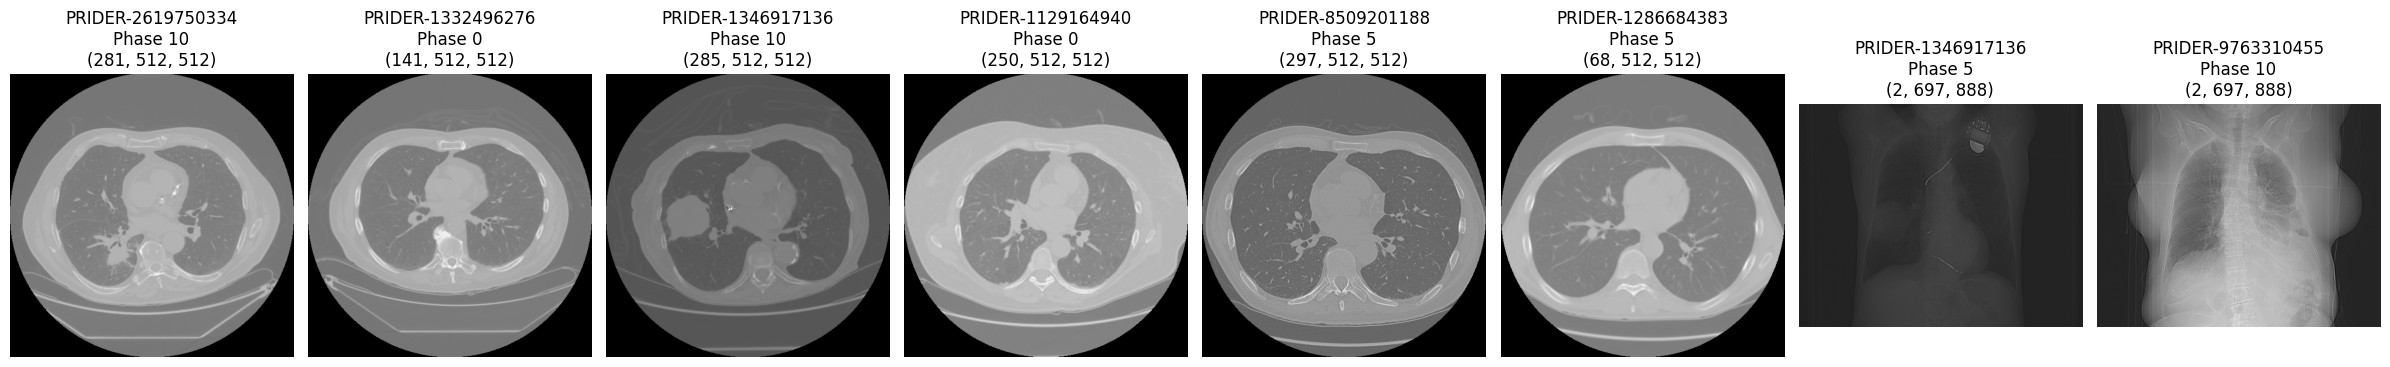

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Filter outliers—phases with non-(N, 512, 512) shape, or specific phase_ids like 0, 13
outlier_phase_ids = [0, 5, 10, 13]  # Replace or expand as needed after reviewing table

# Filter manifest for these phases across all patients
outlier_df = df_shape[df_shape['phase_id'].isin(outlier_phase_ids)]

print(f"Found {len(outlier_df)} outlier phase images.")

# Randomly sample up to 8 to preview
n_preview = min(8, len(outlier_df))
preview_samples = outlier_df.sample(n=n_preview, random_state=42)

plt.figure(figsize=(3*n_preview, 4))
for i, row in enumerate(preview_samples.itertuples()):
    arr = np.load(row.file)
    # Show first (or center) slice (in case of scout/localizer, shape may be (2, H, W) or (N, H, W))
    if arr.ndim == 3:
        center_z = arr.shape[0] // 2
        img = arr[center_z]
    else:
        img = arr[0]
    plt.subplot(1, n_preview, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"P{row.patient_id}\nPhase {row.phase_id}\n{arr.shape}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [16]:
# Choose patient (change index for others)
patient_id = patients[0]
patient_manifest = manifest[manifest['patient_id'] == patient_id].sort_values('phase_id')
phase_ids = patient_manifest['phase_id'].tolist()
phase_percents = patient_manifest['phase_percent'].tolist()
volume_paths = patient_manifest['file_path'].tolist()

# Load all volumes as SimpleITK images (and cast to float32)
sitk_volumes = [sitk.Cast(sitk.GetImageFromArray(np.load(fp)), sitk.sitkFloat32) for fp in volume_paths]

print(f"Patient {patient_id}: loaded {len(sitk_volumes)} phases.")


Patient RIDER-2016615262: loaded 16 phases.


In [7]:
def interpolate_phases(vol1, vol2, n_interp):
    """
    vol1, vol2: SimpleITK images (3D, e.g., phase N and N+1)
    n_interp: number of intermediate frames to generate (excluding endpoints)
    Returns: [vol1, ...interpolated volumes..., vol2] as SimpleITK images
    """
    # DIR: Register vol2 to vol1
    R = sitk.ImageRegistrationMethod()
    R.SetMetricAsMeanSquares()
    R.SetOptimizerAsGradientDescent(learningRate=1.0, numberOfIterations=100, convergenceMinimumValue=1e-6)
    R.SetInitialTransform(sitk.TranslationTransform(vol1.GetDimension()))
    R.SetInterpolator(sitk.sitkLinear)
    # Use a fast, simple registration for demonstration (for publication use B-spline/FastSymmetricForcesDemons, more iterations)
    tx = R.Execute(vol1, vol2)
    # Get deformation field (for nonrigid, use BSplineTransform or Demons)
    # For simplicity, use only linear (translation) here

    # Generate interpolated images
    interp_imgs = []
    for i in range(n_interp+2):  # +2 to include endpoints
        alpha = i / (n_interp+1)
        # Blend images in image space (for real use, blend deformation fields!)
        arr1 = sitk.GetArrayFromImage(vol1)
        arr2 = sitk.GetArrayFromImage(sitk.Resample(vol2, vol1, tx, sitk.sitkLinear))
        blended = (1-alpha) * arr1 + alpha * arr2
        interp_img = sitk.GetImageFromArray(blended.astype(np.float32))
        interp_imgs.append(interp_img)
    return interp_imgs


In [8]:
# Choose number of interpolated frames between each phase (e.g., 3 means 4x real frame rate)
n_interp = 3
all_frames = []
all_frame_percents = []

for k in range(len(sitk_volumes)-1):
    vols = interpolate_phases(sitk_volumes[k], sitk_volumes[k+1], n_interp)
    all_frames.extend(vols[:-1])  # omit duplicate endpoint
    start_percent = phase_percents[k]
    end_percent = phase_percents[k+1]
    # Assign evenly spaced "synthetic" phase_percent to interpolated frames
    for i in range(n_interp+1):
        percent = start_percent + (end_percent - start_percent) * i / (n_interp+1)
        all_frame_percents.append(percent)
# Add last frame
all_frames.append(sitk_volumes[-1])
all_frame_percents.append(phase_percents[-1])

print(f"Generated {len(all_frames)} video frames at {(n_interp+1)}x phase rate.")


MeanSquaresImageToImageMetricv4 (0x3930b70): No valid points were found during metric evaluation. For image metrics, verify that the images overlap appropriately. For instance, you can align the image centers by translation. For point-set metrics, verify that the fixed points, once transformed into the virtual domain space, actually lie within the virtual domain.

MeanSquaresImageToImageMetricv4 (0x3930b70): No valid points were found during metric evaluation. For image metrics, verify that the images overlap appropriately. For instance, you can align the image centers by translation. For point-set metrics, verify that the fixed points, once transformed into the virtual domain space, actually lie within the virtual domain.

MeanSquaresImageToImageMetricv4 (0x3930b70): No valid points were found during metric evaluation. For image metrics, verify that the images overlap appropriately. For instance, you can align the image centers by translation. For point-set metrics, verify that the fi

RuntimeError: Exception thrown in SimpleITK ImageRegistrationMethod_Execute: /tmp/SimpleITK-build/ITK-prefix/include/ITK-5.4/itkRecursiveSeparableImageFilter.hxx:223:
ITK ERROR: RecursiveGaussianImageFilter(0x3d0a0e0): The number of pixels along direction 2 is less than 4. This filter requires a minimum of four pixels along the dimension to be processed.

In [ ]:
# Pick z-index (e.g., center slice)
center_z = int(all_frames[0].GetSize()[0] // 2)
imgs = [sitk.GetArrayFromImage(f)[center_z] for f in all_frames]
phases = all_frame_percents

fig, ax = plt.subplots()
im = ax.imshow(imgs[0], cmap='gray')
title = ax.set_title(f"Phase {phases[0]:.1f}%")
ax.axis('off')

def update(i):
    im.set_array(imgs[i])
    title.set_text(f"Phase {phases[i]:.1f}%")
    return [im, title]

fps = 10  # Choose any desired FPS (e.g., 10 frames per second)
ani = animation.FuncAnimation(fig, update, frames=len(imgs), interval=1000/fps, blit=True)

HTML(ani.to_html5_video())
